# Portfolio Project on Biodiversity

The goal of this project is to explore biodiversity data about different species found in a few of the national parks in the USA, some species of which are endangered. 


### Project Goals
With the help of the data, we want to explore the biodiversity within some of the national parks and some of the species' conservation status:
- What percentage of species are not threatened vs threatened/recovering?
- Which category of organisms is the most under threat/concern?
- Have these species been spotted at any of the national parks within the last 7 days?
- Determine whether threatened/recovering species overall have been spotted at the national parks in the last 7 days.


### Data

The data is given by codecademy.com - it is mostly fictional, but inspired by real life.

The 'observations' file holds recorded sightings of different species at several national parks for the past 7 days.
The 'species_info' file contains data about different species and their conservation statuses.


### Analysis

Some of the key metrics that will be calculated include: 

- distributions
- counts
- relationship between species
- conservation status of species
- observations of species in parks. 

### Explore Data:

In [15]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')

In [99]:
# Get a feel for the data: observations DF
print(observations.head())
print(f"\nobservations shape: {observations.shape}")
print('\n{observations.info()}')
observations.describe(include='all')

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

observations shape: (23281, 3)

{observations.info()}


,scientific_name,park_name,observations
count,23281,23281,23281.000000
unique,5541,4,NaN
top,Castor canadensis,Bryce National Park,NaN
freq,12,5823,NaN
mean,NaN,NaN,142.280357
std,NaN,NaN,69.885439
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [98]:
# Get a feel for the data: species_info DF
print(species_info.head())
print(f"\nspecies shape: {species_info.shape}")
print('\n{species_info.info()}')
species_info.describe(include='all')

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole      Not Threatened  
1                              American Bison, Bison      Not Threatened  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...      Not Threatened  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)      Not Threatened  
4                                      Wapiti Or Elk      Not Threatened  

species shape: (5824, 4)

{species_info.info()}


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,5824
unique,7,5541,5504,5
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Not Threatened
freq,4470,3,7,5633


For the observations file, it does not appear that we are missing any data, there are no null values. All columns have 23296 rows.

For the species_info file, all columns have 5824 rows, but the conservation_status column only has 191 non-null values. This is to be expected, as not all animals are endangered. This is structually missing data.

In [39]:
# Check for any duplicate rows
dup_o = observations.duplicated()
print('observation duplicates:')
print(dup_o.value_counts())

dup_si = species_info.duplicated()
print('\nspecies_info duplicates:')
print(dup_si.value_counts())


observation duplicates:
False    23281
dtype: int64

species_info duplicates:
False    5824
dtype: int64


Looks like the observations DF has 15 duplicates, while the species_info DF has none.

In [28]:
# Remove duplicates in obervations DF
observations = observations.drop_duplicates()

# Check the duplicates are removed
dup_o2 = observations.duplicated()
print(dup_o2.value_counts())

False    23281
dtype: int64


In [29]:
# Finding unique parks in observations DF
observations['park_name'].unique()

array(['Great Smoky Mountains National Park', 'Yosemite National Park',
       'Bryce National Park', 'Yellowstone National Park'], dtype=object)

In [37]:
# Finding unique species categories in species_info DF
species_info['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

In [38]:
# Finding unique species categories & conservation status in species_info DF
species_info['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

In [51]:
# Clean data in species_info by replacing all NaN with 'Not Threatened'
species_info.fillna('Not Threatened', inplace=True)
species_info['conservation_status'].value_counts()

Not Threatened        5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

### Analysis:

In [71]:
# Find Percentage of each group under conservation_status
species_info['conservation_status'].value_counts(normalize=True)*100

Not Threatened        96.720467
Species of Concern     2.764423
Endangered             0.274725
Threatened             0.171703
In Recovery            0.068681
Name: conservation_status, dtype: float64

The vast majority of the data contains non-threatened animals/plants at 96.7%

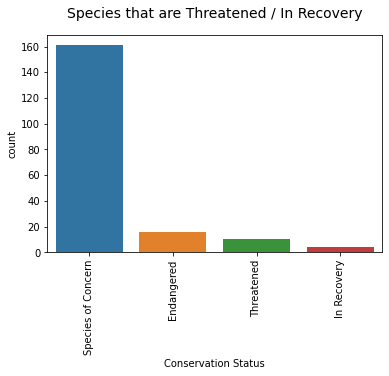

<Figure size 432x288 with 0 Axes>

In [157]:
# Create DF with only species that are threatened / in recovery
endang_info = species_info[species_info.conservation_status != "Not Threatened"]

plt.figure()
ax = sns.countplot(x='conservation_status', data=endang_info)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title('Species that are Threatened / In Recovery', fontsize=14, y=1.05)
plt.xlabel('Conservation Status')
plt.savefig('species_threat_recov.png')
plt.show()
plt.clf()

In [104]:
endang_info_summary = endang_info.groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
endang_info_summary

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


<Figure size 432x288 with 0 Axes>

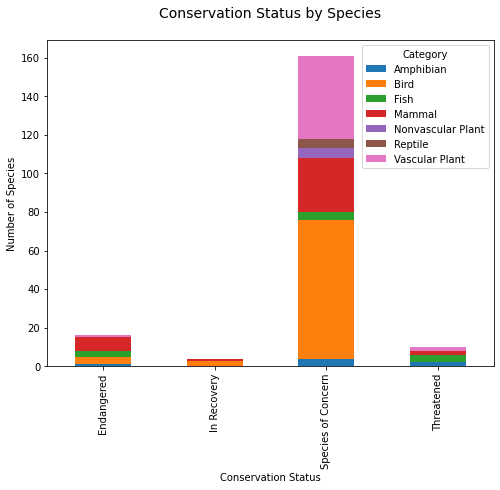

<Figure size 432x288 with 0 Axes>

In [158]:
plt.figure()
ax = endang_info_summary.plot(kind = 'bar', figsize=(8,6), stacked=True)
plt.title('Conservation Status by Species', fontsize=14, y=1.05)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species")
plt.legend(title='Category')
plt.savefig('conservation_by_species.png')
plt.show()
plt.clf()

Here we see the details of what categories make up each of the threatened conservation statuses.
Birds make up the largest part of the Species of Concern status.

Let's look deeper at the birds that are Species of Concern, and see if any of these birds have been spotted at one of the National Parks in our data.

In [114]:
birds_concern = species_info[(species_info.conservation_status == "Species of Concern") 
                             & (species_info.category == 'Bird')]

In [115]:
birds_concern

,category,scientific_name,common_names,conservation_status
91,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern
93,Bird,Accipiter striatus,Sharp-Shinned Hawk,Species of Concern
94,Bird,Aquila chrysaetos,Golden Eagle,Species of Concern
96,Bird,Buteo lineatus,Red-Shouldered Hawk,Species of Concern
98,Bird,Circus cyaneus,Northern Harrier,Species of Concern
...,...,...,...,...
4504,Bird,Elanus leucurus,White-Tailed Kite,Species of Concern
4507,Bird,Cypseloides niger,Black Swift,Species of Concern
4528,Bird,Pica nuttalli,Yellow-Billed Magpie,Species of Concern
4560,Bird,Pyrocephalus rubinus,Vermilion Flycatcher,Species of Concern


In [117]:
# Left merge the DataFrame containing birds that are a Species of Concern with the observations DataFrame
birds_concern_obs = pd.merge(birds_concern, observations, how='left')

birds_concern_obs

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,Bryce National Park,95
1,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,Yosemite National Park,138
2,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,Yellowstone National Park,245
3,Bird,Accipiter cooperii,Cooper's Hawk,Species of Concern,Great Smoky Mountains National Park,65
4,Bird,Accipiter striatus,Sharp-Shinned Hawk,Species of Concern,Yosemite National Park,115
...,...,...,...,...,...,...
315,Bird,Nycticorax nycticorax,Black-Crowned Night Heron,Species of Concern,Yosemite National Park,125
316,Bird,Nycticorax nycticorax,Black-Crowned Night Heron,Species of Concern,Yellowstone National Park,233
317,Bird,Nycticorax nycticorax,Black-Crowned Night Heron,Species of Concern,Great Smoky Mountains National Park,65
318,Bird,Nycticorax nycticorax,Black-Crowned Night Heron,Species of Concern,Yellowstone National Park,206


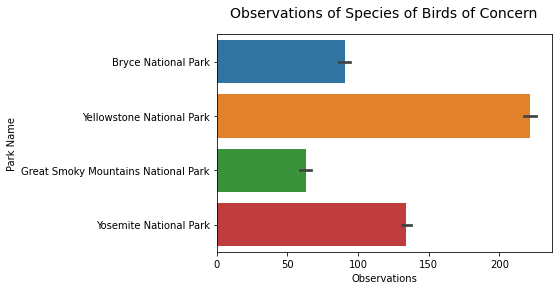

<Figure size 432x288 with 0 Axes>

In [159]:
parks_order=['Bryce National Park','Yellowstone National Park','Great Smoky Mountains National Park','Yosemite National Park']

plt.figure()
ax = sns.barplot(x='observations', y='park_name', data=birds_concern_obs, order=parks_order)
plt.title('Observations of Species of Birds of Concern', fontsize = 14, y=1.05)
plt.ylabel('Park Name')
plt.xlabel('Observations')
plt.savefig('observations_birds_concern.png')
plt.show()
plt.clf()

We can see that Yellowstone National Park has had more sightings of the species of birds that have a conservation status of Concern.

Next we look at the oberservations in the national parks of threatened/recovering species.

In [129]:
# Left merge of the endang_info DataFrame with the observations DataFrame
endang_obs = pd.merge(endang_info, observations, how='left')

print(endang_obs.head())

  category scientific_name common_names conservation_status  \
0   Mammal   Canis latrans       Coyote  Species of Concern   
1   Mammal   Canis latrans       Coyote  Species of Concern   
2   Mammal   Canis latrans       Coyote  Species of Concern   
3   Mammal   Canis latrans       Coyote  Species of Concern   
4   Mammal     Canis lupus    Gray Wolf          Endangered   

                             park_name  observations  
0                  Bryce National Park            85  
1            Yellowstone National Park           206  
2  Great Smoky Mountains National Park            68  
3               Yosemite National Park            99  
4               Yosemite National Park            35  


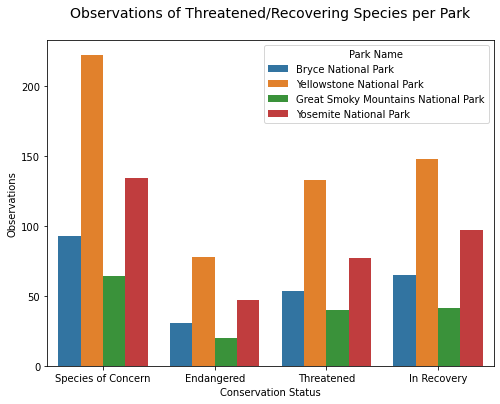

<Figure size 432x288 with 0 Axes>

In [160]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x='conservation_status', y='observations', hue='park_name', data=endang_obs, ci=None)
plt.title('Observations of Threatened/Recovering Species per Park', fontsize=14, y=1.05)
plt.legend(title='Park Name')
plt.ylabel('Observations')
plt.xlabel('Conservation Status')
plt.savefig('threat_per_park.png')
plt.show()
plt.clf()

It is good to see that threatened/recovering species have been spotted at the national parks in the past 7 days, with most of the observations in Yellowstone National Park.

### Conclusions

Using the data, we were able to answer our initial questions:

- What percentage of species are not threatened vs threatened/recovering?
    96.7% of the organisms were not threatened, and 3.3% are threatened or recovering.
    
    
- Which category of organisms is the most under threat/concern?
    Birds.
    
    
- Have these species been spotted at any of the national parks within the last 7 days?
    Yes, with the most sightings at Yellowstone National Park.
    
    
- Determine whether threatened/recovering species overall have been spotted at the national parks in the last 7 days?
    Yes, with most sightings at Yellowstone, followed by Yosemite National Park.